<h1>Mushroom Classifier using Decision Tree Classification</h1>

<p>Classifying mushrooms (23 species of gilled mushrooms in the Agaricus and
    Lepiota Family) into two categories: <strong>edible</strong> and <strong>poisonous</strong> using the <a href="https://archive.ics.uci.edu/ml/datasets/Mushroom">Mushroom Dataset</a></p>
<ul>
    <li>8124 instances</li>
    <li><strong>edible</strong>: 4208 (51.8%)</li>
    <li><strong>poisonous</strong>: 3916 (48.2%)</li>
    <li>22 attributes (nominally valued)</li>
</ul>

<h2>Attributes</h2>

<h3>1. cap-shape</h3>
<!-- <ul>
    <li>bell = b</li>
    <li>conical = c</li>
    <li>convex = x</li>
    <li>flat = f</li>
    <li>knobbed = k</li>
    <li>sunken = s</li>
</ul> -->

<h3>2. cap-surface</h3>
<!-- <ul>
    <li>fibrous = f</li>
    <li>grooves = g</li>
    <li>scaly = y</li>
    <li>smooth = s</li>
</ul> -->

<h3>3. cap-color</h3>
<!-- <ul>
    <li>brown = n</li>
    <li>buff = b</li>
    <li>cinnamon = c</li>
    <li>grey = g</li>
    <li>green = r</li>
</ul> -->
<h3>4. bruises</h3>
<h3>5. odor</h3>
<h3>6. gill-attachment</h3>
<h3>7. gill-spacing</h3>
<h3>8. gill-size</h3>
<h3>9. gill-color</h3>
<h3>10. stalk-shape</h3>
<h3>11. stalk-root</h3>
<h3>12. stalk-surface-above-ring</h3>
<h3>13. stalk-surface-below-ring</h3>
<h3>14. stalk-color-above-ring</h3>
<h3>15. stalk-color-below-ring</h3>
<h3>16. veil-type</h3>
<h3>17. veil-color</h3>
<h3>18. ring-number</h3>
<h3>19. ring-type</h3>
<h3>20. spore-print-color</h3>
<h3>21. population</h3>
<h3>22. habitat</h3>

<h2><strong>Step 1</strong>: Importing/installing libraries</h2>

In [1]:
!conda install python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    hcf35c78_1003         1.5 MB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001         340 KB  conda-forge
    fribidi-1.0.9              |       h516909a_0         113 KB  conda-forge
    gettext-0.19.8.1           |    hc5be6a0_1002         3.6 MB  conda-forge
    glib-2.64.2                |       h6f030ca_1         3.4 MB  conda-forge
    graphite2-1.3.13           |    he1b5a44_1001         102 KB  conda-forge
    graph

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #az adatokat ezzel válasszuk szét train és test adatokra
from sklearn import metrics #metrics for accuracy calculation
from sklearn.preprocessing import LabelEncoder

<h2><strong>Step 2</strong>: Loading data into DataFrame</h2>

In [3]:
columns = ['label', 
           'cap-shape', 
           'cap-surface', 
           'cap-color', 
           'bruises', 
           'odor', 
           'gill-attachment',
           'gill-spacing',
           'gill-size', 
           'gill-color',
           'stalk-shape',
           'stalk-root',
           'stalk-surface-above-ring',
           'stalk-surface-below-ring',
           'stalk-color-above-ring',
           'stalk-color-below-ring',
           'veil-type',
           'veil-color',
           'ring-number',
           'ring-type',
           'spore-print-color',
           'population',
           'habitat'
          ]
data = pd.read_csv('./data/agaricus-lepiota.data', header = None, names = columns)

In [4]:
data.head()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<h2><strong>Step 3</strong>: Data exploration</h2>

In [5]:
print(data.shape)

(8124, 23)


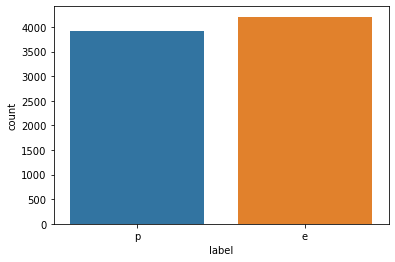

In [6]:
#kovetkeztetes: kiegyensulyozott a dataset, kb ugyanannyi mergezo gomba van, mit eheto
x = data['label']
ax = sns.countplot(x=x, data=data)

<h3>The dataset is balanced, approximately there are as many edible as poisonous mushrooms.</h3>
<p>That means the features of one category won't be biased against the features of the other.</p>

<h2>Plotting the dataset based on every feature</h2>

In [7]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7, 8.27)})
        ax = sns.countplot(x=data[col], hue=hue, data=data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


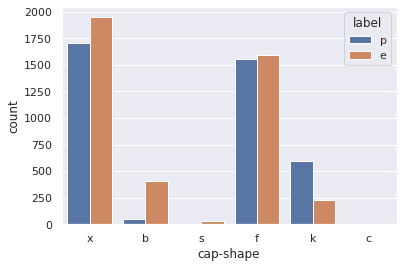

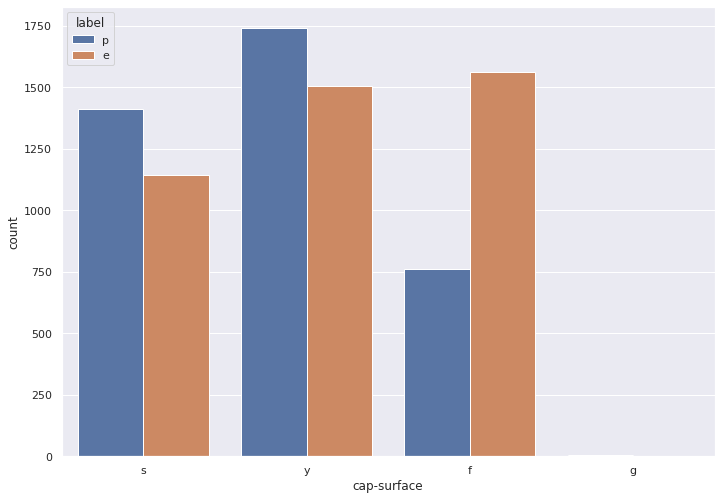

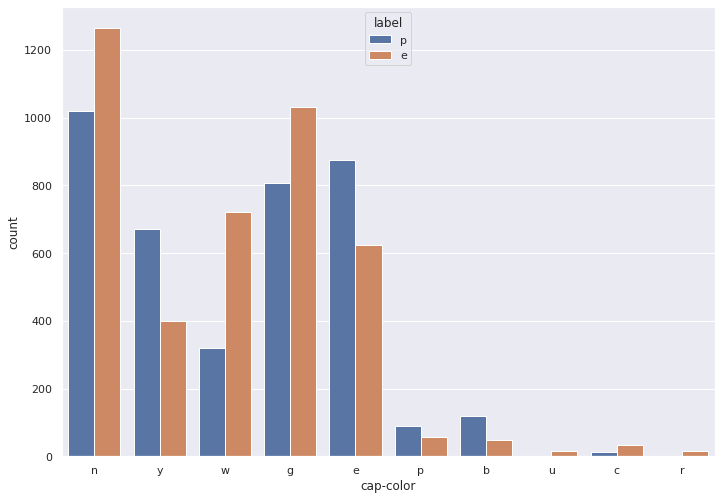

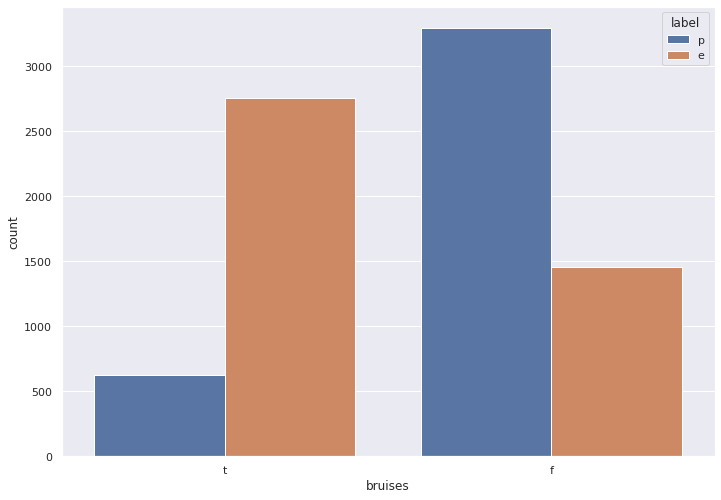

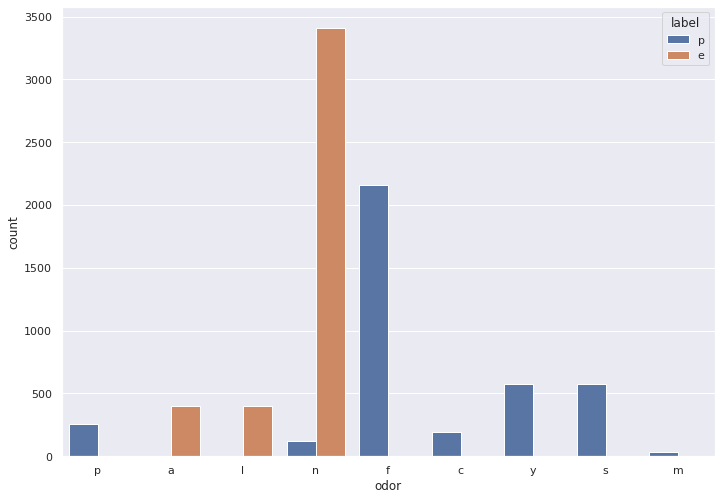

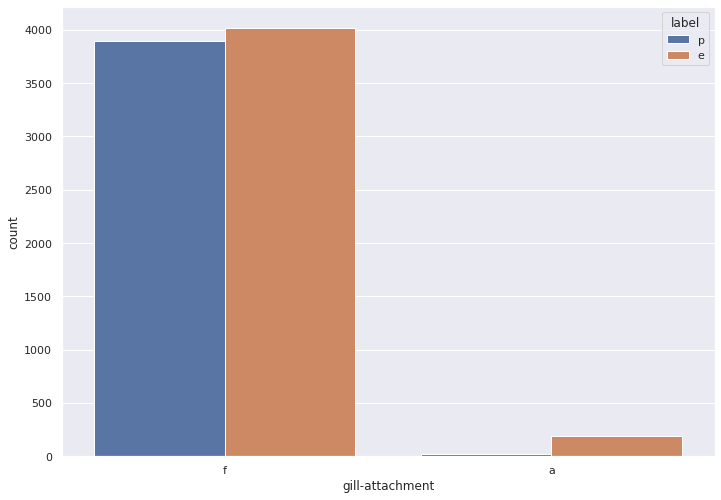

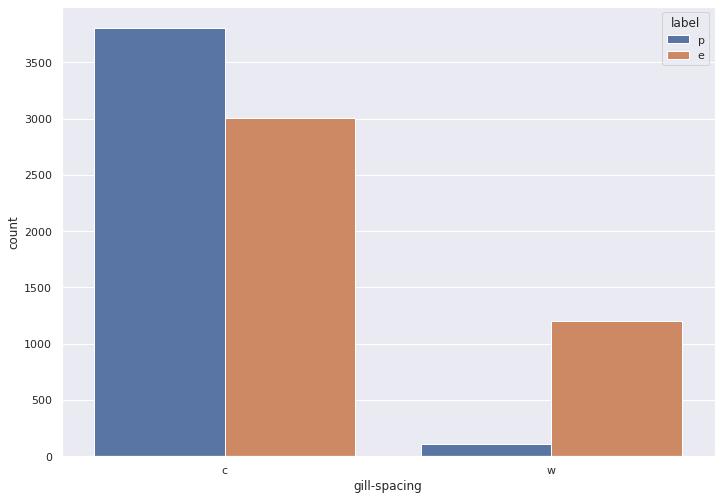

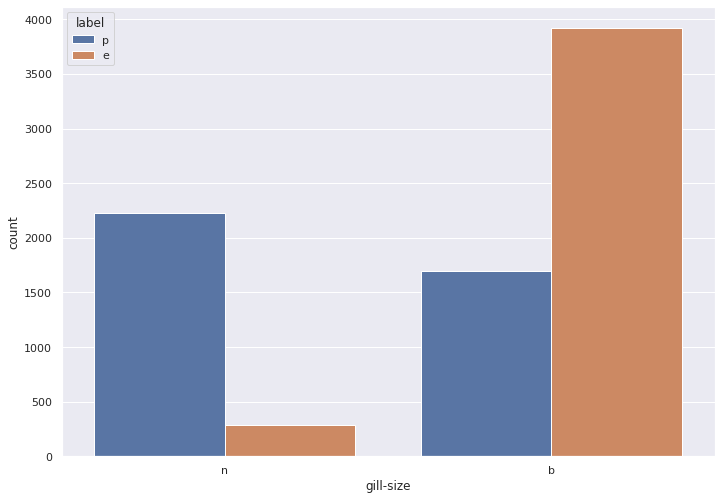

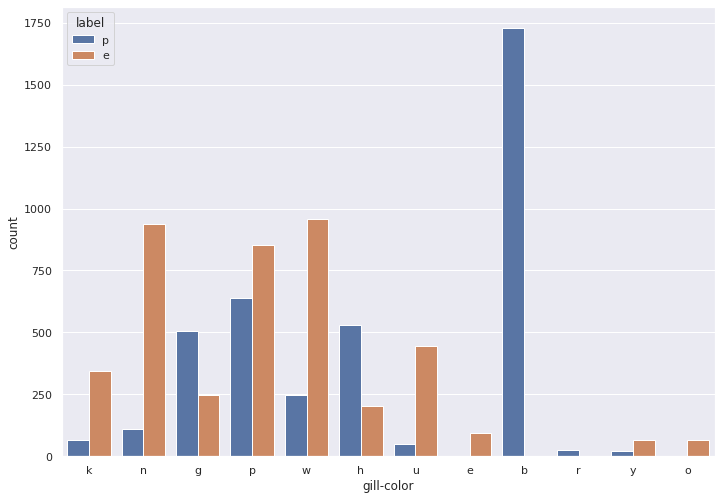

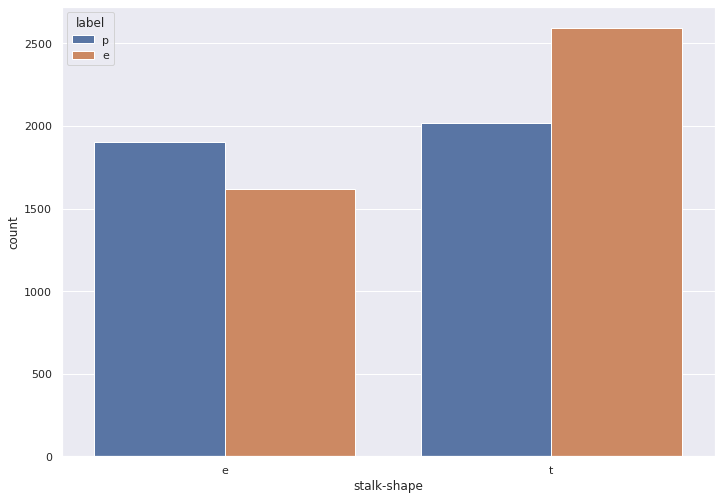

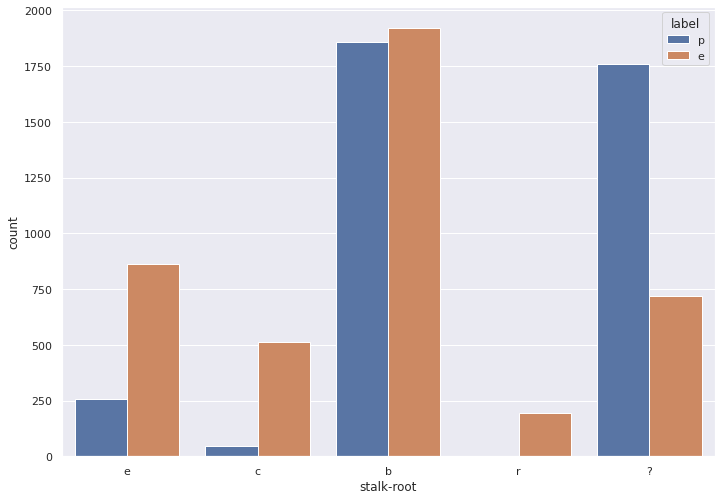

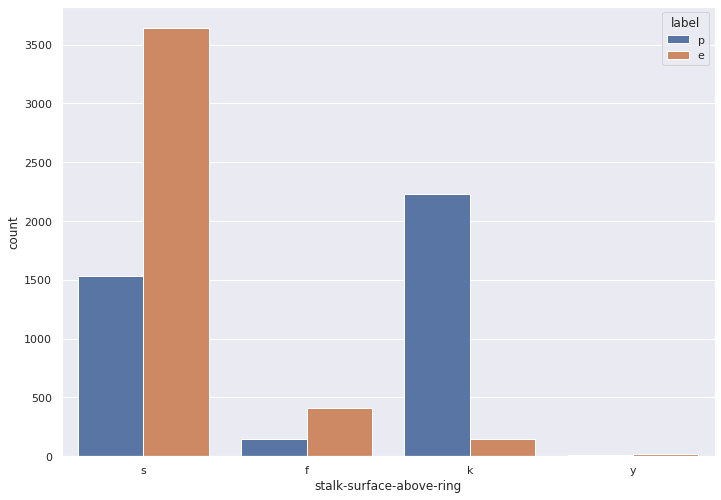

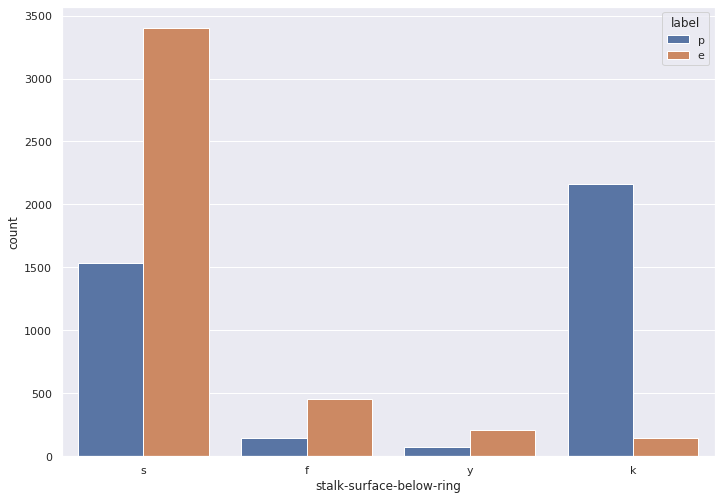

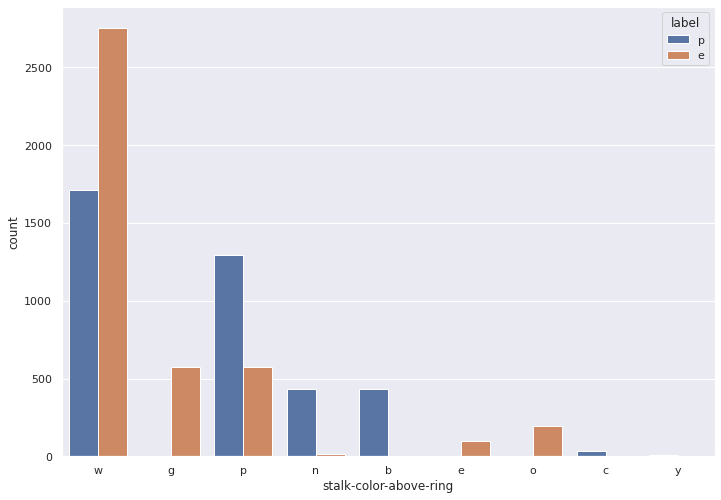

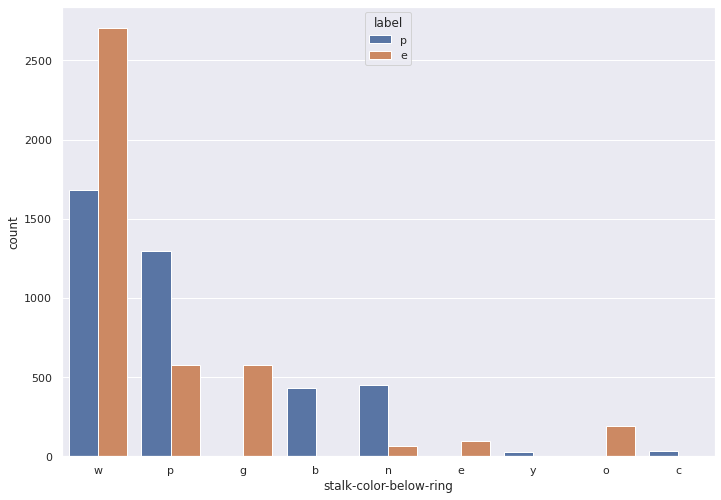

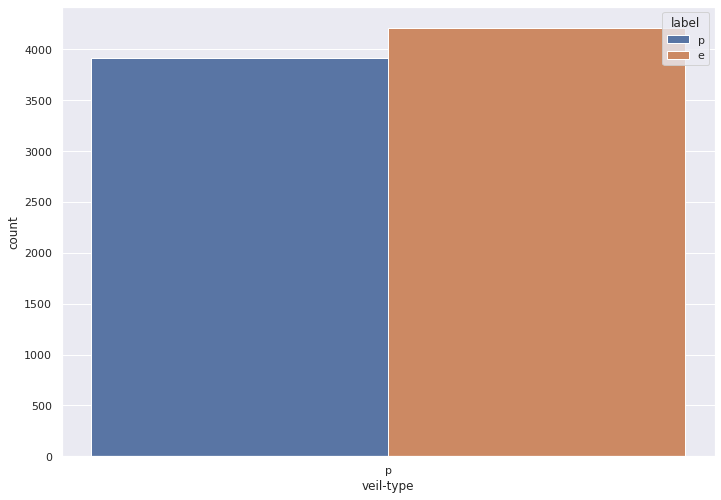

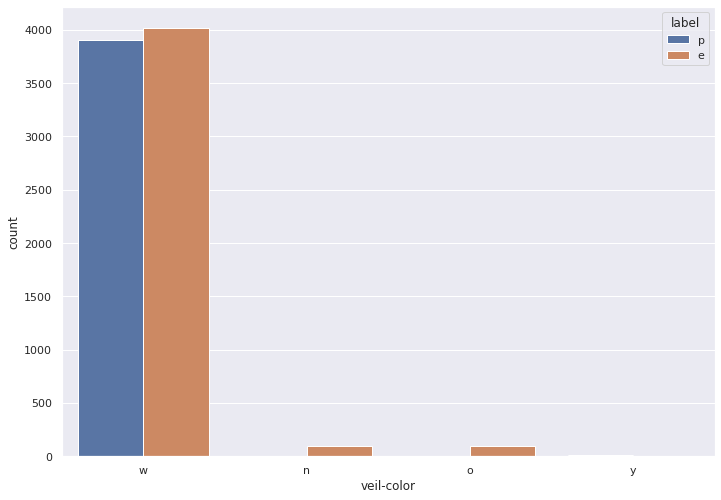

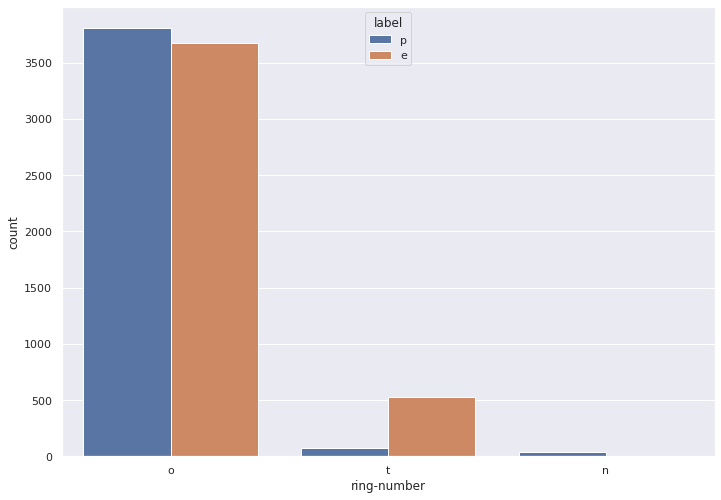

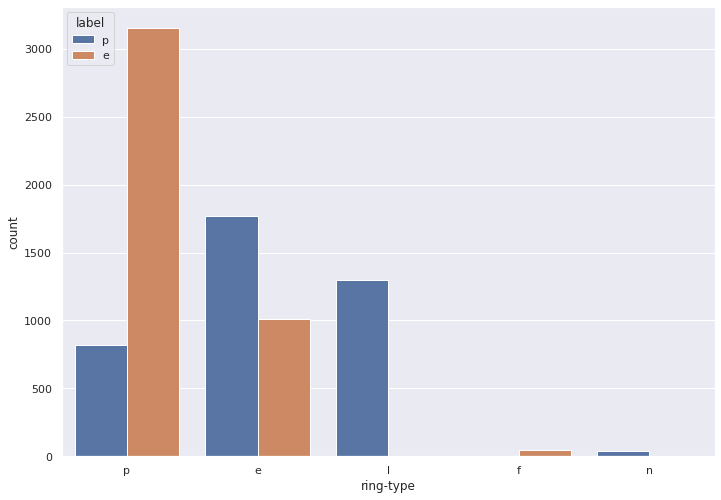

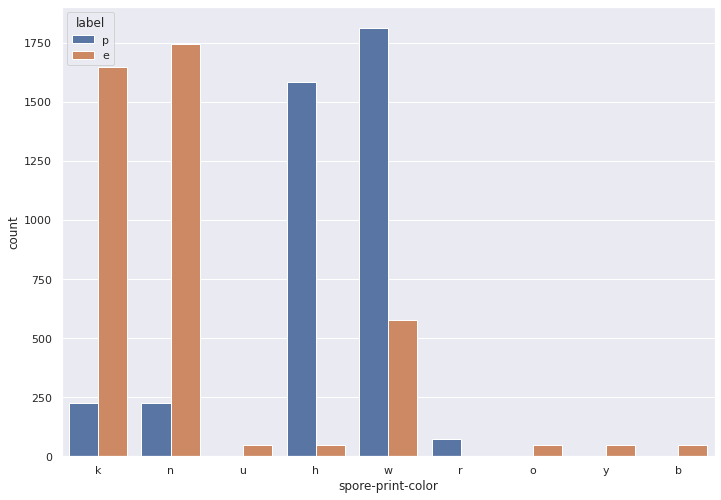

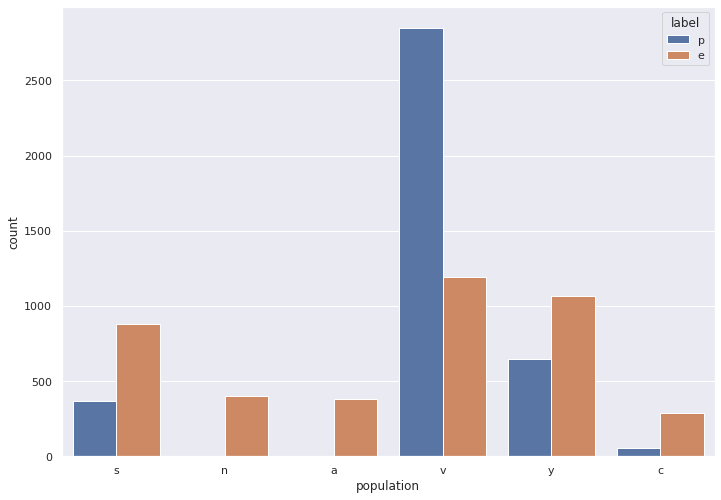

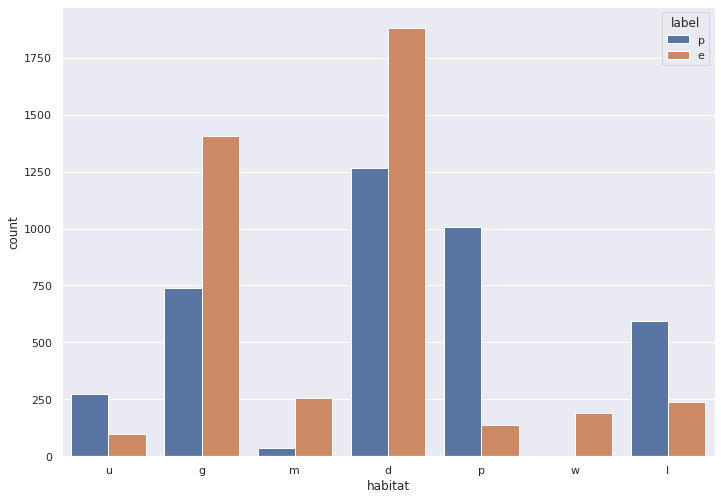

In [8]:
hue = data['label']
data_for_plot = data.drop('label', 1)
plot_data(hue, data_for_plot)

<p>Source of code snippet and idea for this step: <a href="https://towardsdatascience.com/building-a-perfect-mushroom-classifier-ceb9d99ae87e">towardsdatascience.com</a></p>

<h2><strong>Step 4</strong>: Label encoding</h2>

<p><strong>Transforming nominal values into numerical values</strong>, preparing the dataframe for the classifier algorithm.</p>
<p>example: p, e => 1, 0</p>

In [9]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [10]:
data.head()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<h4>1 = poisonous</h4>
<h4>0 = edible</h4>

<h2><strong>Step 5</strong>: Creating vector from every feature</h2>

<p>Avoiding false correlations by encoding every possible feature option into standalone feature, therefore none of the options for a given feature will be regarded as being more important than the others.</p>

In [11]:
#encoding every different feature option into a standalone feature
encoded_data = pd.get_dummies(data)

encoded_data.head()

,label,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


<p>Source of code snippet and idea for this step: <a href="https://towardsdatascience.com/building-a-perfect-mushroom-classifier-ceb9d99ae87e">towardsdatascience.com</a></p>

<h2><strong>Step 6</strong>: Creating <strong>feature matrix</strong> and <strong>target vector</strong></h2>

In [12]:
#featue matrix
feature_cols = list(encoded_data.columns.values[1:])
X = encoded_data[feature_cols]

#target vector
y = encoded_data.label

In [13]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: label, Length: 8124, dtype: int64

<h2><strong>Step 7</strong>: Splitting data into <strong>training set</strong> and <strong>test set</strong></h2>

<p>80% - training<br>20% - test</p>

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<h2><strong>Step 8</strong>: Training and predicting</h2>

In [16]:
classifier = DecisionTreeClassifier() #creating classifer object 

classifier = classifier.fit(X_train,y_train) #training

y_pred = classifier.predict(X_test) #predicting using the test dataset

<h2><strong>Step 9</strong>: Measuring accuracy</h2>

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


<p>The model can correctly predict whether a mushroom is poisonous or edible, <strong>for every mushroom in the TEST SET</strong></p>

<h2><strong>Step 10</strong>: Visualizing the decision tree</h2>

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


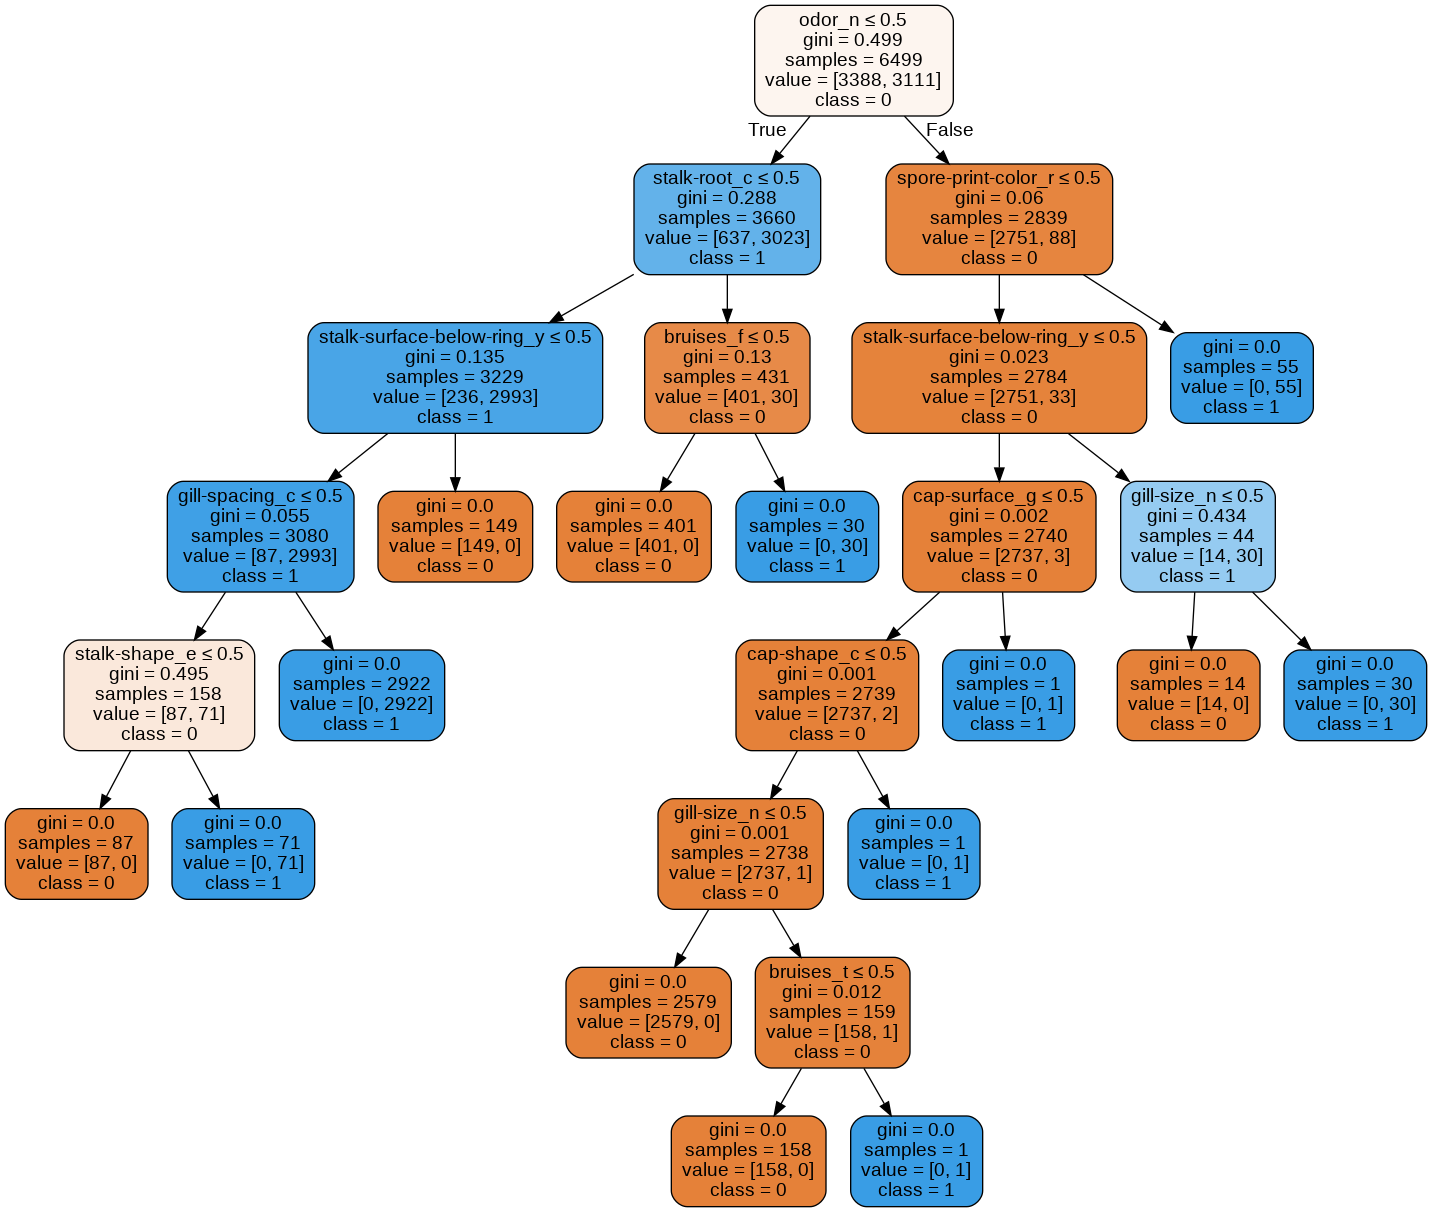

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mushroom_decision_tree.png')
Image(graph.create_png())

<h3><strong>gini</strong></h3> <p>Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.</p>

<p>In other words, the Gini impurity index answers the following question:<br>
<strong>What is the probability of classifying an element wrongly, if we choose it randomly from the samples of the current node?</strong>
</p>

<p>
If the Gini index is close to 1, it means we have to make another decision based on a different feature in order to classify the elements of the given sample correctly.
<br>
<br>
If the Gini index is 0, it means that every sample can be classified into a single class (into it's correct class), therefore we don't need more decisions to correctly label the samples of the current node.
<br>
<br>
If the Gini index is 0 at every leaf of the decision tree, it means we have a model that can correctly classify every element of the test set.
</p>
src: <a href="https://en.wikipedia.org/wiki/Decision_tree_learning">this Wikipedia page</a>/Metrics/Gini impurity

<p>Source of code snippet and idea for this step: <a href="https://scikit-learn.org/stable/modules/tree.html">scikit-learn.org</a></p>

<h2><strong>Step 11</strong>: Pruning the decision tree</h2>

<p>Sometimes decision trees can get large, in this case, our tree is spanning over 7 levels below the root. According to this, in the worst case scenario, our model has to make 7 decisions to finally classify a mushroom as edible or poisonous.</p>

<p>Too many levels can make a decision tree's classification method hard to understand. Therefore it is more useful if we have a simpler model, with fewer decisions to make.</p>

<p>In order to get a simpler model, we train another decision tree with a maximum depth of 4.</p>

In [81]:
max_depth = 4

In [82]:
#creating classifer object, setting maximum depth
simpler_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

simpler_classifier = simpler_classifier.fit(X_train,y_train) #training 

y_pred = simpler_classifier.predict(X_test) #predicting

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9913846153846154


<h3>And finally, visualizing our new decision tree, with a maximal depth of 4.</h3>

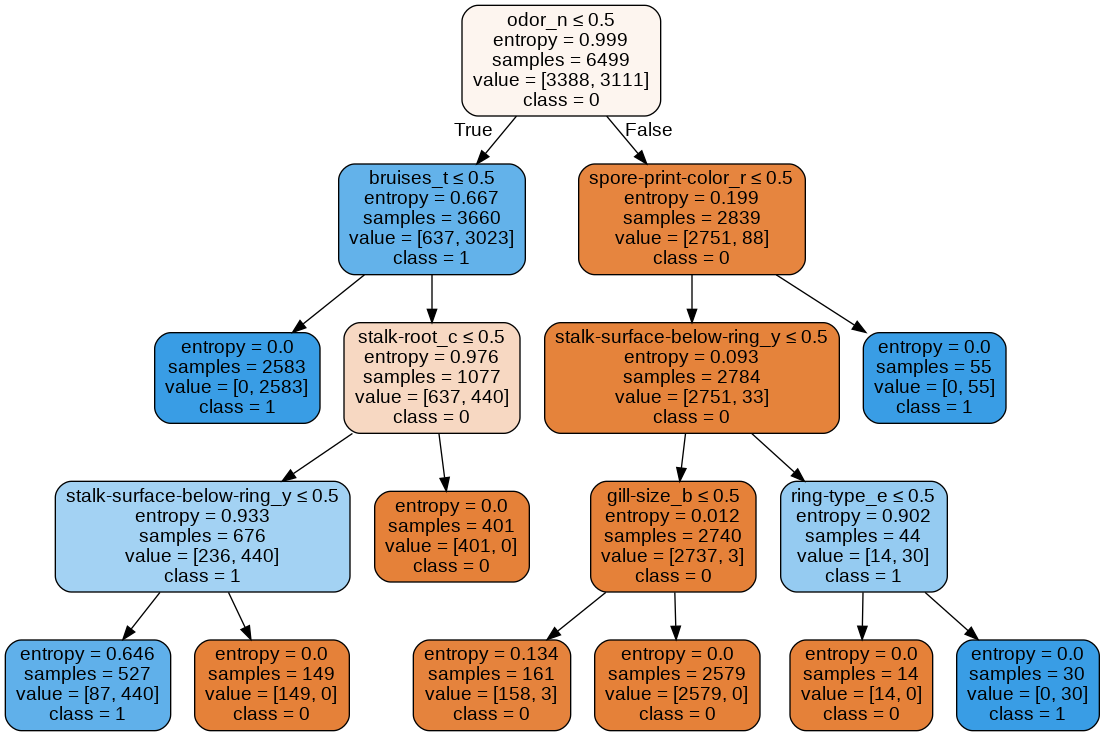

In [83]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(simpler_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mushroom_decision_tree_maxDepth' + str(max_depth) + '.png')
Image(graph.create_png())

<h3><strong>entropy</strong></h3> <p>Entropy is the measure of impurity, disorder or <strong>uncertainty</strong> in a set of samples. Source: <a href="https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01">this Medium article</a></p>